<a href="https://colab.research.google.com/github/Katie0731/stats_DL/blob/main/0523_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%80%ED%94%8C_%EC%97%B0%EC%8A%B5_(TPU)_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaurdyou","key":"65b4fed121c42003bb7a2d1b0466d46f"}'}

In [2]:
import os
os.listdir()

['.config', 'kaggle.json', 'sample_data']

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c unifesp-x-ray-body-part-classifier

100% 29.9G/29.9G [06:50<00:00, 121MB/s] 
100% 29.9G/29.9G [06:50<00:00, 78.3MB/s]


In [5]:
os.listdir()

['.config',
 'unifesp-x-ray-body-part-classifier.zip',
 'kaggle.json',
 'sample_data']

In [6]:
!unzip -qq unifesp-x-ray-body-part-classifier.zip

In [ ]:
os.listdir()

['.config',
 'train.csv',
 'sample_submission.csv',
 'kaggle.json',
 'train',
 'test',
 'sample_data']

In [7]:
os.remove('unifesp-x-ray-body-part-classifier.zip')

In [ ]:
cd train

/content/train


In [ ]:
os.listdir('train')

['535',
 '481',
 '916',
 '764',
 '1333',
 '649',
 '924',
 '76',
 '283',
 '897',
 '606',
 '56',
 '230',
 '671',
 '243',
 '534',
 '34',
 '1073',
 '578',
 '151',
 '660',
 '125',
 '1317',
 '1181',
 '685',
 '1331',
 '497',
 '1287',
 '234',
 '589',
 '1090',
 '876',
 '10',
 '19',
 '422',
 '1159',
 '1370',
 '973',
 '674',
 '643',
 '592',
 '1254',
 '854',
 '941',
 '192',
 '101',
 '908',
 '1055',
 '975',
 '1167',
 '656',
 '84',
 '1302',
 '337',
 '213',
 '236',
 '623',
 '14',
 '868',
 '1210',
 '1074',
 '244',
 '372',
 '368',
 '86',
 '809',
 '1086',
 '659',
 '1301',
 '1153',
 '157',
 '1170',
 '102',
 '49',
 '829',
 '810',
 '1263',
 '164',
 '1369',
 '826',
 '959',
 '1259',
 '350',
 '1281',
 '1123',
 '845',
 '1257',
 '751',
 '276',
 '1160',
 '1252',
 '1131',
 '177',
 '858',
 '472',
 '296',
 '1392',
 '1350',
 '486',
 '1020',
 '202',
 '1066',
 '1348',
 '673',
 '953',
 '237',
 '1135',
 '1096',
 '539',
 '1318',
 '849',
 '1256',
 '676',
 '1266',
 '833',
 '412',
 '521',
 '748',
 '154',
 '1382',
 '1205',
 

In [ ]:
print(len(os.listdir('train')))

912


In [ ]:
ls

train/


In [ ]:
cd -

/content


In [ ]:
#cd -

/content/test


In [ ]:
#ls

test/


In [ ]:
#cd -

/content/test


In [ ]:
#cd -

/content/test/test


In [ ]:
#print(len(os.listdir('test')))

411


In [8]:
import pandas as pd
df = pd.read_csv("train.csv")

In [ ]:
df.shape

(1738, 2)

In [10]:
labels = df['SOPInstanceUID']
labels

0       1.2.826.0.1.3680043.8.498.10025629581362719970...
1       1.2.826.0.1.3680043.8.498.10036150326276641158...
2       1.2.826.0.1.3680043.8.498.10038426859954986240...
3       1.2.826.0.1.3680043.8.498.10050991192143676483...
4       1.2.826.0.1.3680043.8.498.10053309524595490852...
                              ...                        
1733    1.2.826.0.1.3680043.8.498.99711016467406172920...
1734    1.2.826.0.1.3680043.8.498.99727280485333900933...
1735    1.2.826.0.1.3680043.8.498.99935008698914755885...
1736    1.2.826.0.1.3680043.8.498.99969671777553755311...
1737    1.2.826.0.1.3680043.8.498.99979421603039894766...
Name: SOPInstanceUID, Length: 1738, dtype: object

In [43]:
train_index_dir = "train/train/"

train_index_paths = sorted(
    [os.path.join(train_index_dir, fname)
     for fname in os.listdir(train_index_dir)])

In [49]:
fname = os.listdir(train_index_paths[5])
fname = "".join(fname)
fname

'1.2.826.0.1.3680043.8.498.61746690124118892528305417421864320307'

In [50]:
fname2 = os.listdir(train_index_paths[5]+ "/" + fname)
fname2 = "".join(fname2)
fname2

'1.2.826.0.1.3680043.8.498.21605553573167556338806385057474412247'

In [51]:
fname3 = os.listdir(train_index_paths[5]+ "/" + fname + "/" + fname2)
fname3 = "".join(fname3)
fname3

'1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925-c.dcm'

In [26]:
my_path = '/content/drive/MyDrive/additional_package'
!pip install --target=$my_path pydicom

import sys
sys.path.append('/content/drive/MyDrive/additional_package')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.9 MB/s 


In [52]:
import pydicom
import matplotlib.pyplot as plt

file_path = train_index_paths[5]+ "/" + fname + "/" + fname2 + "/" + fname3
dcm = pydicom.dcmread(file_path)
img = dcm.pixel_array

/content/drive/MyDrive/additional_package/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


In [36]:
img.shape

(3480, 4240)

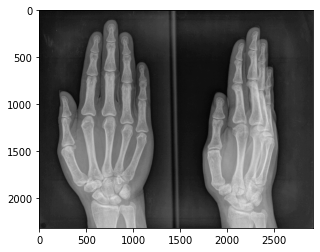

In [59]:
plt.imshow(img, cmap='gray_r')